## **Time Series Analysis:**
---

1. Plot meal service trends over time (line plot)
2. Identify and analyze spikes in meal service (meals > 3000)
3. Create seasonal categorization (Spring, Summer, Autumn, Winter)
4. Analyze waste patterns by day of the week and months

### **Import Data** 

In [1]:

import pandas as pd 
df = pd.read_csv("processed_food_data.csv")
df.head()


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,season,month
0,0,2022-01-01,202.0,9,31.976787,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
1,1,2022-01-01,202.0,9,32.318759,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
2,2,2022-01-01,202.0,9,31.976787,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
3,3,2022-01-01,202.0,9,32.318759,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
4,4,2022-01-02,448.0,16,10.092464,56.130327,6,0,29.890039,Intermediate,Grains,Winter,1


### **1. Plot meal service trends over time (line plot)**

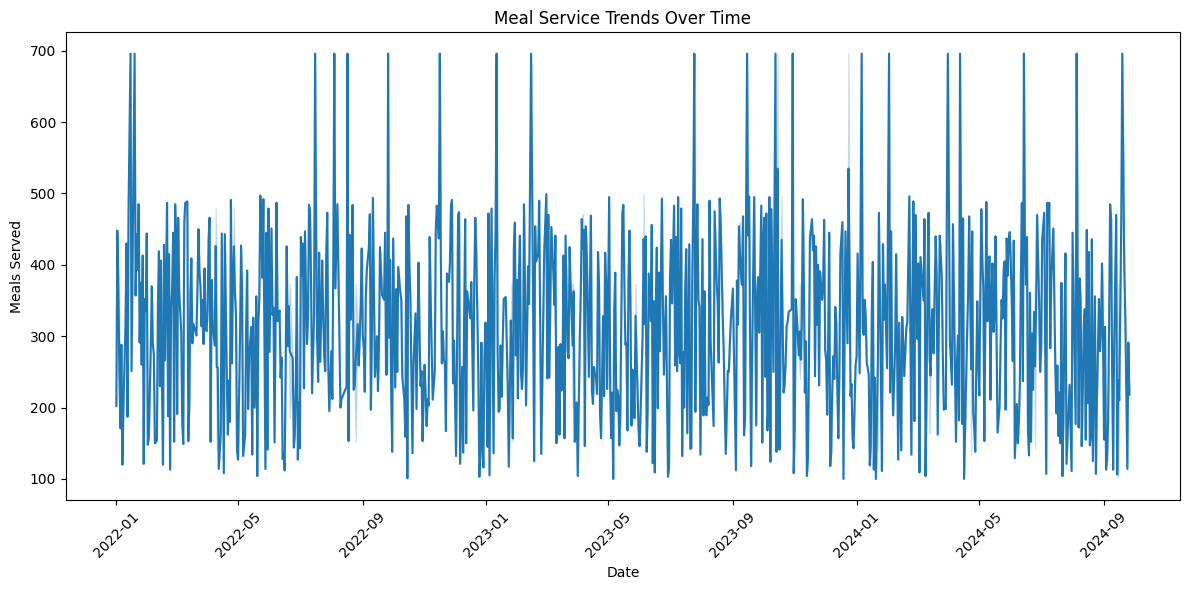

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure 'date' is datetime and sorted for plotting
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.sort_values('date', inplace=True)

# Plot meal service trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='meals_served')
plt.title('Meal Service Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Meals Served')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **2. Identify and analyze spikes in meal service (meals > 3000)**

In [3]:
# Filter rows where meals_served > 3000
spikes = df[df['meals_served'] > 3000]

# Check if there are any spikes
print("Spikes in meal service (meals > 3000):")
print(spikes)

   

Spikes in meal service (meals > 3000):
Empty DataFrame
Columns: [ID, date, meals_served, kitchen_staff, temperature_C, humidity_percent, day_of_week, special_event, past_waste_kg, staff_experience, waste_category, season, month]
Index: []


### **3. Create seasonal categorization (Spring, Summer, Autumn, Winter)**


In [4]:
# Define a function to categorize seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new 'season' column

df['date'] = pd.to_datetime(df['date'])

# Apply the function to create a new 'season' column
df['season'] = df['date'].apply(get_season)

# Display the updated DataFrame
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,season,month
0,0,2022-01-01,202.0,9,31.976787,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
1,1,2022-01-01,202.0,9,32.318759,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
2,2,2022-01-01,202.0,9,31.976787,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
3,3,2022-01-01,202.0,9,32.318759,66.826645,5,0,45.445455,Intermediate,Meat,Winter,1
4,4,2022-01-02,448.0,16,10.092464,56.130327,6,0,29.890039,Intermediate,Grains,Winter,1


### **4. Analyze waste patterns by day of the week and months**

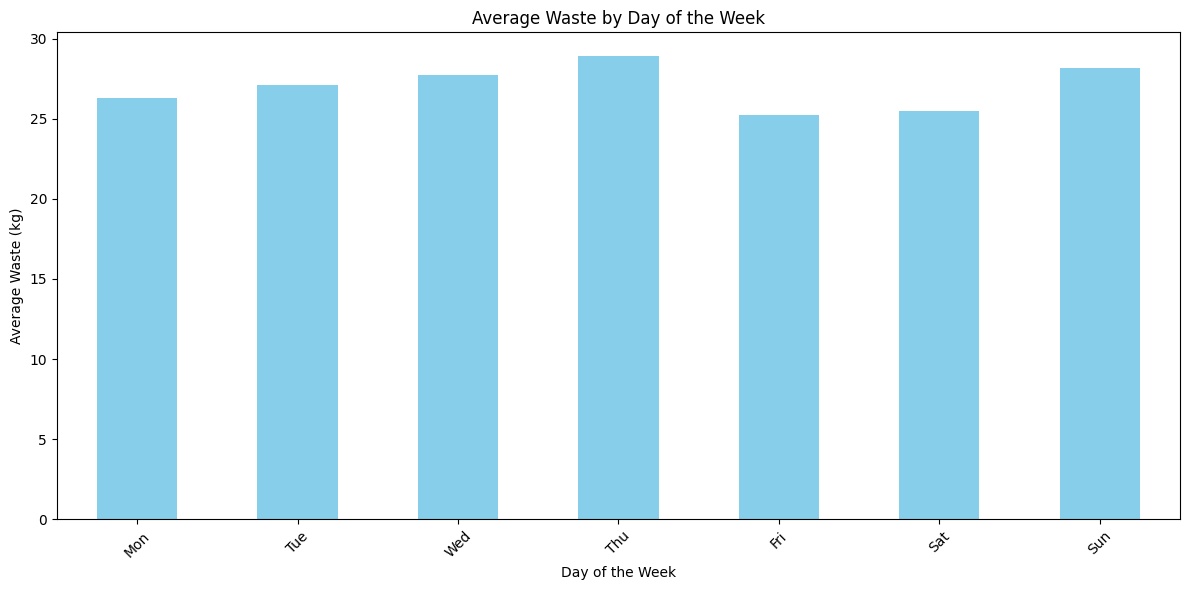

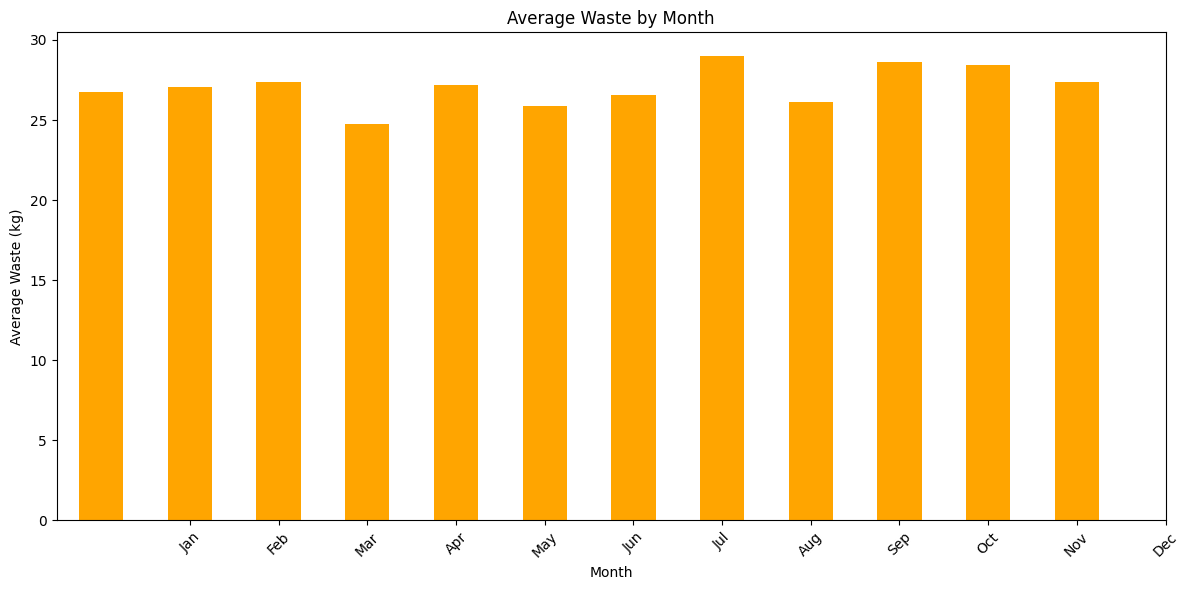

In [5]:
# Group by day_of_week and calculate average waste
avg_waste_by_day = df.groupby('day_of_week')['past_waste_kg'].mean()

# Extract month from the date and group by month to calculate average waste
df['month'] = df['date'].dt.month
avg_waste_by_month = df.groupby('month')['past_waste_kg'].mean()

# Plot average waste by day of the week
plt.figure(figsize=(12, 6))
avg_waste_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Waste by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Waste (kg)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.tight_layout()
plt.show()

# Plot average waste by month
plt.figure(figsize=(12, 6))
avg_waste_by_month.plot(kind='bar', color='orange')
plt.title('Average Waste by Month')
plt.xlabel('Month')
plt.ylabel('Average Waste (kg)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Save the current DataFrame to CSV without the index
df.to_csv("processed_food_data.csv", index=False)


---